In [75]:
import pandas as pd
import seaborn as sns
import numpy as np

In [179]:
df = pd.read_csv('kc_house_data.csv')

In [127]:
df = pd.read_csv('Cleaned_Housing_Data_v1.csv')

In [128]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,2.0,98125,47.7210,-122.319,1690,7639
2,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [130]:
df = df.drop(['Unnamed: 0'], axis=1)

In [131]:
df['ppsqft'] = df.price / df.sqft_living

In [132]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ppsqft
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,2.0,98125,47.7210,-122.319,1690,7639,209.338521
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,233.766234
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429


In [161]:
df = df[df.bedrooms < 20]

In [4]:
df.isnull().sum()

Unnamed: 0          0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2320
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [181]:
df['view'].fillna(value=0.0, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21265 entries, 0 to 21264
Data columns (total 20 columns):
Unnamed: 0       21265 non-null int64
price            21265 non-null float64
bedrooms         21265 non-null float64
bathrooms        21265 non-null float64
sqft_living      21265 non-null float64
sqft_lot         21265 non-null float64
floors           21265 non-null float64
waterfront       18945 non-null float64
view             21265 non-null float64
condition        21265 non-null float64
grade            21265 non-null float64
sqft_above       21265 non-null float64
sqft_basement    21265 non-null float64
yr_built         21265 non-null float64
yr_renovated     21265 non-null float64
zipcode          21265 non-null float64
lat              21265 non-null float64
long             21265 non-null float64
sqft_living15    21265 non-null float64
sqft_lot15       21265 non-null float64
dtypes: float64(19), int64(1)
memory usage: 3.2 MB


In [14]:
df.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21265.000000,2.126500e+04,21265.000000,21265.000000,21265.000000,2.126500e+04,21265.000000,18945.000000,21265.000000,21265.000000,21265.000000,21265.000000,21265.000000,21265.000000,21265.000000,21265.000000,21265.00000,21265.000000,21265.000000,21265.000000
mean,10809.527769,5.338003e+05,3.316106,2.092946,2053.357724,1.499923e+04,1.487538,0.007495,0.228921,3.398730,7.627839,1770.967552,276.691888,1965.305855,0.099553,97787.331954,47.41886,-121.851418,1975.970233,12689.465883
std,6237.061656,3.555239e+05,0.846282,0.757318,898.822621,4.137326e+04,0.544774,0.086253,0.757134,0.675061,1.238011,819.514784,429.074957,111.066847,0.591999,5330.850195,2.58861,6.643859,689.507727,27123.547913
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-122.519000,0.000000,0.000000
25%,5414.000000,3.200000e+05,3.000000,1.500000,1410.000000,5.012000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.46830,-122.328000,1480.000000,5100.000000
50%,10814.000000,4.500000e+05,3.000000,2.250000,1900.000000,7.587000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.57080,-122.229000,1830.000000,7611.000000
75%,16213.000000,6.382500e+05,4.000000,2.500000,2520.000000,1.060200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,530.000000,1997.000000,0.000000,98117.000000,47.67800,-122.123000,2350.000000,10069.000000
max,21596.000000,7.060000e+06,5.000000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,5.000000,98199.000000,47.77760,0.000000,6210.000000,871200.000000


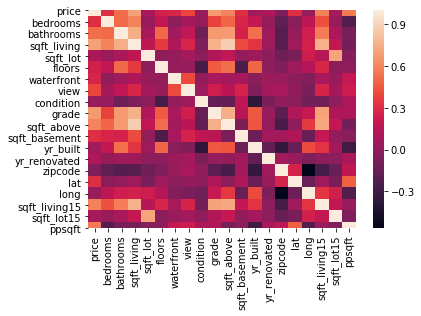

In [138]:
sns.heatmap(df.corr())

In [111]:
used_cols = ['sqft_living', 'lat', 'long', 'grade', 'bedrooms', 'bathrooms', 'yr_built', 'zipcode', 'view', 'yr_renovated', 'sqft_living15']
X,y = df[used_cols], df['price']

In [136]:
used_cols = [ 'sqft_living', 'lat', 'long', 'grade', 'bedrooms', 'bathrooms', 'zipcode', 'view']
X,y = df[used_cols], df['ppsqft']

In [137]:
from pygam import LinearGAM


gam = LinearGAM(n_splines=25)
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:13 Time:  0:00:13


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    127.7414
Link Function:                     IdentityLink Log Likelihood:                                -195527.584
Number of Samples:                        21263 AIC:                                           391312.6507
                                                AICc:                                          391314.2315
                                                GCV:                                             3973.7834
                                                Scale:                                           3930.8347
                                                Pseudo R-Squared:                                   0.6765
Feature Function                  Lam

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  


In [126]:
from pygam.terms import s as spline
from pygam.terms import f as factor
from pygam.terms import te as tensor


# DEFINE TERMS:
#   * splines - for continuous
#   * factors - for categorical/discrete 
#        (assumption: label encoded w/ 0 to level_size-1)
#   * tensors - for any interactions

# create the term list
term_list = []
for i, col in enumerate(used_cols):
    term_list.append(spline(i))

# add the x1 and x2 interaction term
term_list.append(tensor(0, 1, 2))
term_list.append(tensor(1, 2))
term_list.append(tensor(12, 13))

term_list.append(factor(3))
term_list.append(factor(6))
term_list.append(factor(9))

# create the terms and model
terms = np.sum(term_list)
print(terms)
gam = LinearGAM(terms=terms).gridsearch(X.values, y.values)
gam.summary()

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + te(0, 1, 2) + te(1, 2) + te(12, 13) + f(3) + f(6) + f(9)


100% (11 of 11) |########################| Elapsed Time: 0:04:41 Time:  0:04:41


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    482.3331
Link Function:                     IdentityLink Log Likelihood:                               -518044.8218
Number of Samples:                        21263 AIC:                                          1037056.3097
                                                AICc:                                         1037078.8419
                                                GCV:                                      15848440318.3277
                                                Scale:                                    15202660351.6159
                                                Pseudo R-Squared:                                    0.882
Feature Function                  Lam

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, train_size = .7)
# Define model
# Fit model
gam.fit(train_X, train_y)
#get predicted prices on validation data
val_predictions = gam.predict(val_X)
train_predictions = gam.predict(train_X)
print("mean absolute error train: " , mean_absolute_error(train_y, train_predictions))
print("mean absolute error test: " , mean_absolute_error(val_y, val_predictions))
print("r2 predict train: " , r2_score(train_y, train_predictions))
print("r2 predict test: " , r2_score(val_y, val_predictions))
#print(cross_val_score(gam, train_X, train_y, cv=3, scoring = 'r2'))

mean absolute error train:  76694.50645379939
mean absolute error test:  84642.77750711289
r2 predict train:  0.8743192121991367
r2 predict test:  0.7760068438104828


In [24]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor

In [139]:
from pygam import GAM


gam = GAM(distribution='gamma', link='log')
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:20 Time:  0:00:20


GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    109.0985
Link Function:                          LogLink Log Likelihood:                               -113866.2289
Number of Samples:                        21263 AIC:                                           227952.6548
                                                AICc:                                          227953.8114
                                                GCV:                                                0.0441
                                                Scale:                                              0.0455
                                                Pseudo R-Squared:                                   0.7233
Feature Function                  Lam

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  


In [88]:
import pygam
import pandas
import numpy
import numpy.random
import seaborn
import vtreat
import vtreat.util
import vtreat.transform

In [115]:
class GAMTransform(vtreat.transform.UserTransform):
    """a gam model"""
    def __init__(self):
        vtreat.transform.UserTransform.__init__(self, treatment='gam')
        self.models_ = None

    def fit(self, X, y):
        self.models_ = { 
            v:pygam.LinearGAM().fit(X[[v]], y) 
                for v in X.columns 
                if vtreat.util.can_convert_v_to_numeric(X[v])}
        self.incoming_vars_ = [v for v in self.models_.keys()]
        self.derived_vars_ = [(v + "_gam") for v in self.incoming_vars_]
        return self
        
    def transform(self, X):
        cols = {
            self.derived_vars_[i]:self.models_[self.incoming_vars_[i]].predict(X[[self.incoming_vars_[i]]]) 
                for i in range(len(self.incoming_vars_))}
        return pandas.DataFrame(cols)

In [116]:
step = GAMTransform()

In [117]:
fit = step.fit_transform(df[used_cols], df['price'])
print(step.derived_vars_)
fit[used_cols] = df[used_cols]
fit.head()

['sqft_living_gam', 'lat_gam', 'long_gam', 'grade_gam', 'bedrooms_gam', 'bathrooms_gam', 'yr_built_gam', 'zipcode_gam', 'view_gam', 'yr_renovated_gam', 'sqft_living15_gam']


,sqft_living_gam,lat_gam,long_gam,grade_gam,bedrooms_gam,bathrooms_gam,yr_built_gam,zipcode_gam,view_gam,yr_renovated_gam,...,lat,long,grade,bedrooms,bathrooms,yr_built,zipcode,view,yr_renovated,sqft_living15
0,349802.556463,397474.190398,629636.661769,401117.414101,466277.049456,346471.746741,483196.032280,452449.875817,494196.473635,527846.626417,...,47.5112,-122.257,7,3,1.00,1955,98178,0.0,0.0,1340
1,612324.374155,517500.156335,436063.577422,401117.414101,466277.049456,520706.567372,475663.958856,463597.111271,494196.473635,765485.568972,...,47.7210,-122.319,7,3,2.25,1951,98125,0.0,2.0,1690
2,283367.945040,476324.576553,664101.771077,301353.555374,401386.694844,346471.746741,627782.466462,464704.585550,494196.473635,527846.626417,...,47.7379,-122.233,6,2,1.00,1933,98028,0.0,0.0,2720
3,467483.954077,444718.900484,606036.148630,401117.414101,635564.256089,775192.206029,441593.501556,461813.243697,494196.473635,527846.626417,...,47.5208,-122.393,7,4,3.00,1965,98136,0.0,0.0,1360
4,422303.913219,847260.231909,563565.561594,540487.579950,466277.049456,467222.902860,543918.234553,672392.254312,494196.473635,527846.626417,...,47.6168,-122.045,8,3,2.00,1987,98074,0.0,0.0,1800


In [28]:
gused_cols = ['sqft_living_gam', 'lat_gam', 'long_gam', 'grade_gam', 'bedrooms_gam', 'bathrooms_gam', 'yr_built_gam', 'zipcode_gam', 'view_gam', 'yr_renovated_gam', 'condition_gam', 'floors_gam', 'sqft_above_gam', 'sqft_living15_gam']
X,y = fit[gused_cols], df['price']